# 0. Importing packages

In [171]:
from scipy.optimize import differential_evolution
import numpy as np
from matplotlib import pyplot as plt

from packages.functions import calcL1MET, cache, calcTurnOn
from packages.plotting import *
import optimisation as opt

# 1. Loading data

In [175]:
eosdir = "root://xrootd-cms.infn.it//store/user/lathomas/Muon0/NANOAOD_Muon0Run2023D_ZMu_PromptReco_v2RAW_RECO_2023_v0_4_HFZS3p5GeV/240212_080440/0000/out_5.root"
test, _ = opt.prepareInputs(dir=eosdir, subset=1, cuts=(0,300))

Reading in calo tower data


ModuleNotFoundError: Install XRootD python bindings with:

    conda install -c conda-forge xrootd

(or download from http://xrootd.org/dload.html and manually compile with cmake; setting PYTHONPATH and LD_LIBRARY_PATH appropriately).

In [172]:
data2024 = "/shared/scratch/wq22321/data/NANOAOD_Muon0Run2023D_ZMu_PromptReco_v2RAW_RECO_2023_v0_4/231121_100830/0000/out_*.root"
fit, _ = opt.prepareInputs(dir = data2024, subset=1.0, cuts=(0, 300))

Reading in calo tower data


KeyboardInterrupt: 

In [ ]:
#calo, puppi, ntt4 = fit
cache(mode="write", datCollection=fit)

Writing calo to /shared/scratch/wq22321/cached_MET_data/calo.csv
Writing puppi to /shared/scratch/wq22321/cached_MET_data/puppi.csv
Writing ntt4 to /shared/scratch/wq22321/cached_MET_data/ntt4.csv


In [ ]:
calo, puppi, ntt4 = 

# 2. Optimisation

In [173]:
datasmall = "/shared/scratch/wq22321/data/NANOAOD_Muon0Run2023D_ZMu_PromptReco_v2RAW_RECO_2023_v0_4/231121_100830/0000/out_10.root"
fit2, _ = opt.prepareInputs(dir=datasmall, subset=1.0, cuts=(0,300))

Reading in calo tower data
Reading in PUPPI MET pT and phi
Calculating x and y components of PUPPI MET
Reading in muon pT and phi
Calculating muon ptx and pty for each event
Calculating PUPPI MET no Mu and reformatting data


/users/wq22321/methackathon_2024/packages/functions.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfcand_muons['muon_ptx'] = np.cos(pfcand_muons['Muon_phi']) * pfcand_muons['Muon_pt']
/users/wq22321/methackathon_2024/packages/functions.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfcand_muons['muon_pty'] = np.sin(pfcand_muons['Muon_phi']) * pfcand_muons['Muon_pt']


Subsetting events
Calculating NTT4


In [174]:
print("Starting optimisation")

bounds = [(0, 3), (0, 4), (0, 3), (0, 4)]
x0 = (2.0, 2.0, 0.5, 2.0)
turn_on_options = (True, 60, 0.1)
result = differential_evolution(
    func     = opt.objective,
    bounds   = bounds,
    args     = (fit2, turn_on_options),
    
    x0 = x0,
    popsize  = 15,    # 15
    maxiter  = 10,    # 1000
    strategy = "best1bin",    # "best1bin"
    init     = "sobol",    #"latinhypercube"
    disp     = True,
    workers  = 8,    # 1
    polish   = False
    )

print(result.x)
print(result)

Starting optimisation


/users/wq22321/methackathon_2024/.venv/lib/python3.9/site-packages/scipy/optimize/_differentialevolution.py:487: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,



Currently trying: a = 2.0, b = 2.0, c = 0.5 and d = 2.0

Currently trying: a = 1.91, b = 0.57, c = 2.07 and d = 1.28

Currently trying: a = 0.82, b = 0.16, c = 1.29 and d = 3.3

Currently trying: a = 2.86, b = 1.95, c = 0.56 and d = 2.81

Currently trying: a = 0.61, b = 0.77, c = 0.57 and d = 1.98

Currently trying: a = 1.52, b = 1.12, c = 1.33 and d = 0.41

Currently trying: a = 1.18, b = 1.65, c = 2.06 and d = 2.39

Currently trying: a = 2.44, b = 0.49, c = 2.79 and d = 4.0
Width: 97.57084573822914

Currently trying: a = 2.38, b = 3.86, c = 1.08 and d = 2.2
Width: 161.92622950819674

Currently trying: a = 1.49, b = 2.03, c = 0.35 and d = 3.68
Width: 92.93300071275837

Currently trying: a = 1.81, b = 2.74, c = 2.29 and d = 1.67
Width: 101.55485306170236

Currently trying: a = 0.56, b = 3.4, c = 1.53 and d = 0.21
Width: 100.53972666203383

Currently trying: a = 2.72, b = 2.32, c = 1.85 and d = 3.11
Width: 161.18825359782187

Currently trying: a = 1.1, b = 3.54, c = 2.58 and d = 2.51
W

Process ForkPoolWorker-14:
Traceback (most recent call last):
  File "/software/wq22321/miniconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/software/wq22321/miniconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/software/wq22321/miniconda/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/software/wq22321/miniconda/lib/python3.9/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/users/wq22321/methackathon_2024/.venv/lib/python3.9/site-packages/scipy/_lib/_util.py", line 426, in __call__
    return self.f(x, *self.args)
  File "/users/wq22321/methackathon_2024/optimisation.py", line 77, in objective
    MET, _ = applyCaloTowerThresh(calo, a, b, c, d)
KeyboardInterrupt
Process ForkPoolWorker-15:
Traceback (most recent call last):
  File "/software/wq22321/miniconda/lib/python3.9/mu

KeyboardInterrupt: 

# 3. Parameter analysis

In [ ]:
""" Parameters """

fw = (0.66881105, 1.77791976, 0.96226907, 2.08912586)
reg = (0.21456065, 2.74961211, 0.47896413, 0.30650943)
old = (1.707, 3.078, 0.195, 1.365)

zmu23_1 = (1.87, 1.34, 0.1, 2.84)
zmu23_2 = (1.49, 2.91, 0.26, 1.51)
zmu23_3 = (2.34, 2.82, 0.37, 2.79)


rmse = (1.69851912, 2.511431, 0.31321421, 3.70933707)
turnon = (1.54119447, 2.76036528, 0.5173701, 1.42313447)

turnon_new = (2.36378052, 2.16203578, 0.39757358, 3.24863973)
lastYear = (1.707, 3.078, 0.195, 1.365)
rmse_new = (1.81378556, 2.34812814, 0.05456035, 2.04916082)

In [ ]:
def heatmapper(a, b, c, d):
    dat = lookup_gen(a, b, c, d)
    ietas, pu_bins, thresh = zip(*dat)
    plt.figure(figsize=(15,9))
    plt.hist2d(ietas, pu_bins, weights=thresh, bins=[83, 32])
    plt.colorbar()
    #plt.xlim([1,41]); plt.ylim([0,31])
    plt.xlabel("ieta"); plt.ylabel("NTT4 bin")
    plt.title("2D histogram of tower threshold (scaled by tower size)")
    plt.show()

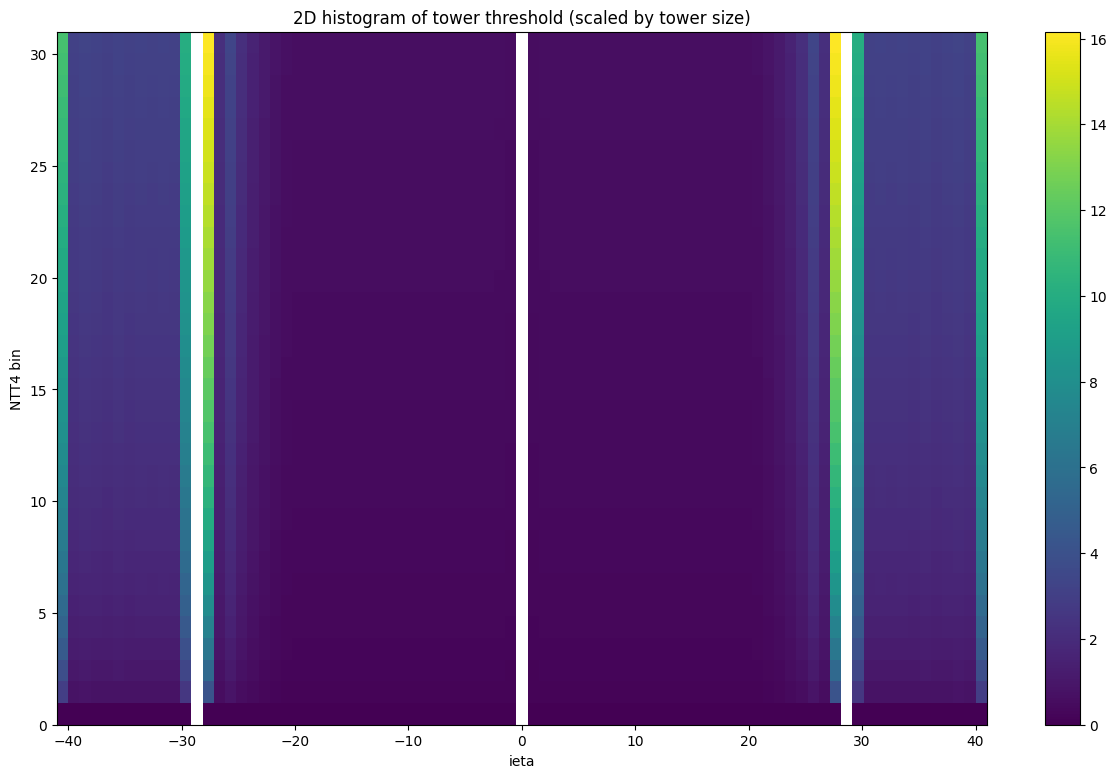

In [ ]:
heatmapper(*turnon_new)

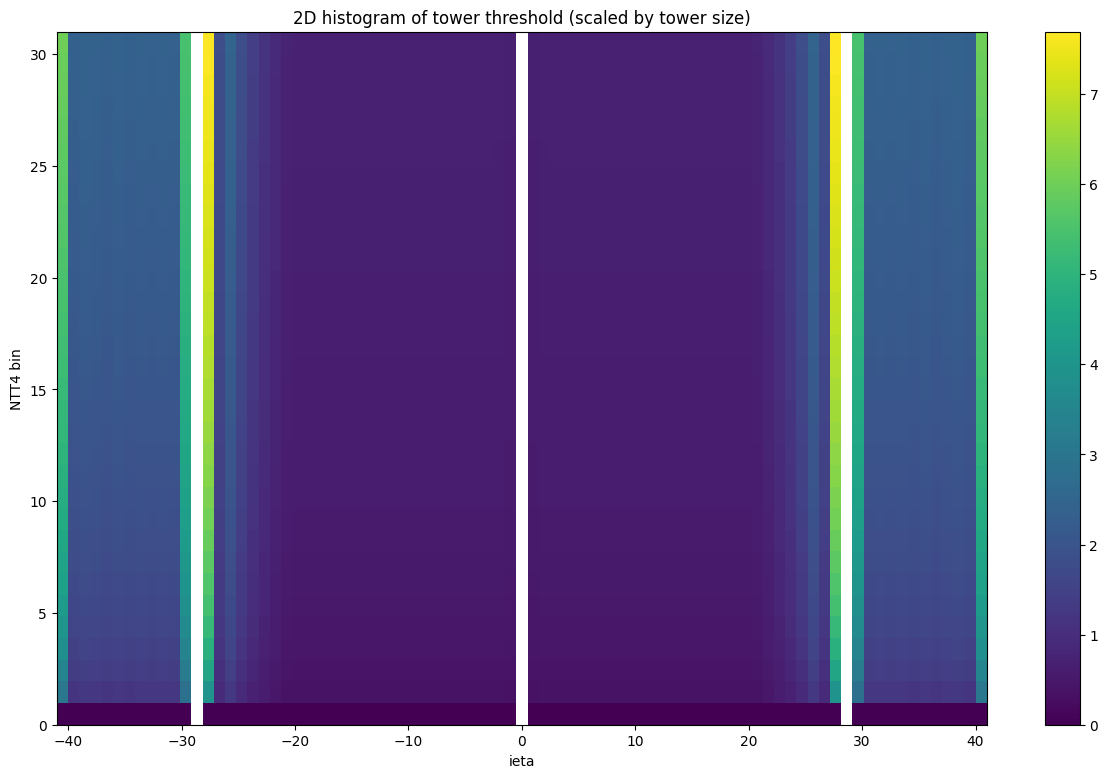

In [ ]:
heatmapper(*lastYear)

In [ ]:
def plotTurnOn(*METs, offline=puppi, threshold=80, lowEff=0.1):

    plt.figure(figsize=(10,6))
    
    for MET, desc in METs:
        bins, eff = getTurnOn(online = MET, offline=offline, threshold=threshold)
        width = calcTurnOn(MET, puppi, threshold=threshold, lowEff=lowEff)
        plt.plot(bins, eff, label="{}. Width = {}".format(desc, np.round(width, 2)))

    plt.title("Turn on curve, threshold = {} GeV".format(threshold))
    plt.xlabel("Offline MET (GeV)"); plt.ylabel("Fixed threshold efficiency")
    plt.grid(True, linestyle='--', color='gray', alpha=0.5)
    plt.hlines(1.0 - lowEff, xmin=0, xmax=300, colors='gray', linestyles='--', alpha=0.5)
    plt.hlines(lowEff, xmin=0, xmax=300, colors='gray', linestyles='--', alpha=0.5)
    plt.legend()
    plt.show()

In [ ]:
l1met = calcL1MET(calo)

In [ ]:
rmse_MET = opt.applyCaloTowerThresh(calo, *rmse_new)[0]

In [ ]:
turnon_MET_old = opt.applyCaloTowerThresh(calo, *turnon)[0]

In [ ]:
turnon_MET = opt.applyCaloTowerThresh(calo, *turnon_new)[0]

In [ ]:
lastyear_MET = opt.applyCaloTowerThresh(calo, *lastYear)[0]

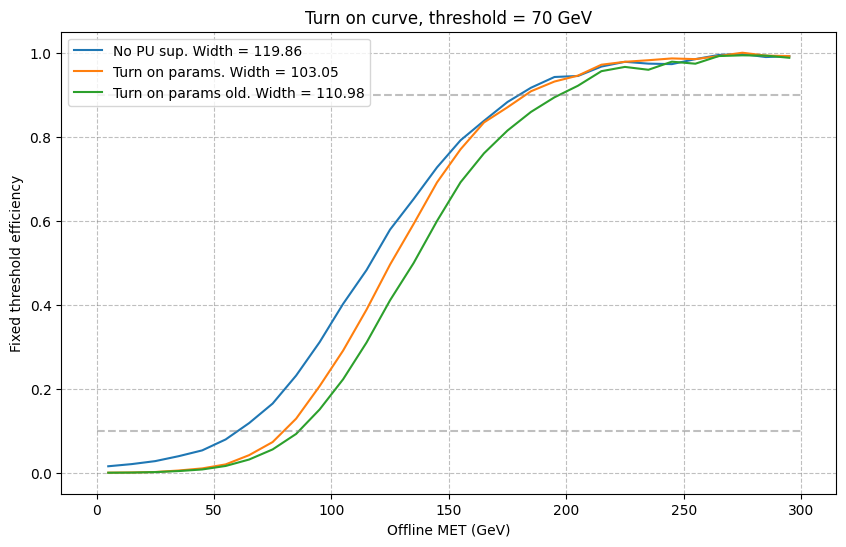

In [ ]:
plotTurnOn(
    (l1met, "No PU sup"),
    #(rmse_MET, "RMSE"),
    (turnon_MET, "Turn on params"),
    (turnon_MET_old, "Turn on params old"),
    #(lastyear_MET, "Last year params PU sup"),
    threshold=70
)

In [ ]:
def plotplots(*METs, what, offline=puppi):
    
    plt.figure(figsize=(10,6))
    
    for MET, desc in METs:
        bins, q68, q95, resp, res = getResidual(online=MET, offline=offline)

        if what == "quart68":
            plt.plot(bins, q68, label=desc)

        elif what == "quart95":
            plt.plot(bins, q95, label=desc)

        elif what == "resp":
            plt.plot(bins, resp, label=desc)
        
        elif what == "res":
            plt.plot(bins, res, label=desc)
        
        else:
            raise Exception("Invalid what argument")


    plt.grid(True, linestyle='--', color='gray', alpha=0.5)

    if what == "quart68":
        plt.title("68th quartile")
        #plt.ylim(0, 450)
    elif what == "quart95":
        plt.title("95th quartile")
        #plt.ylim(0, 450)
    elif what == "res":
        plt.title("Resolution")
        plt.ylabel("Mean resolution")
        #plt.ylim(-5,5)
        plt.hlines(0, xmin=0, xmax=300, colors='gray', linestyles='--', alpha=0.5)
    elif what == "resp":
        plt.title("Response")
        plt.ylabel("Mean response")
        #plt.ylim(0, 6)
        plt.hlines(1, xmin=0, xmax=300, colors='gray', linestyles='--', alpha=0.5)
    else:
        raise Exception("Invalid what argument")

    plt.xlabel("Offline MET (GeV)")
    plt.legend()
    plt.show()

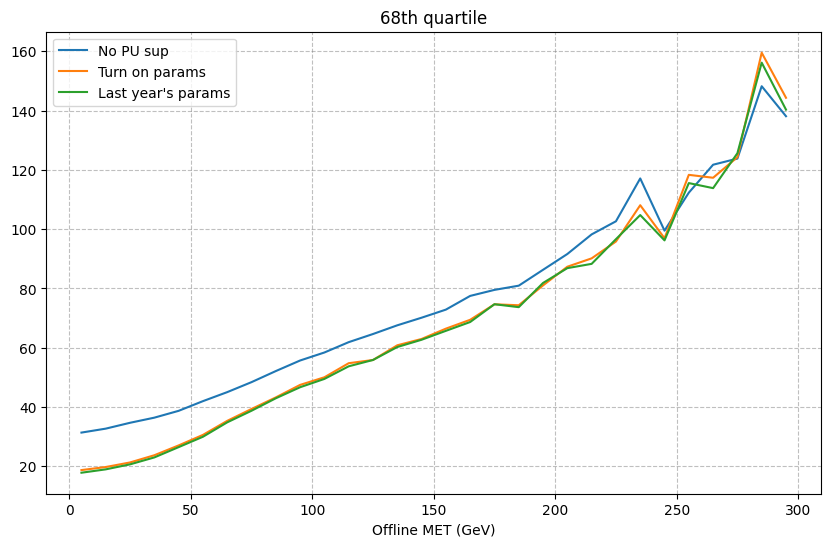

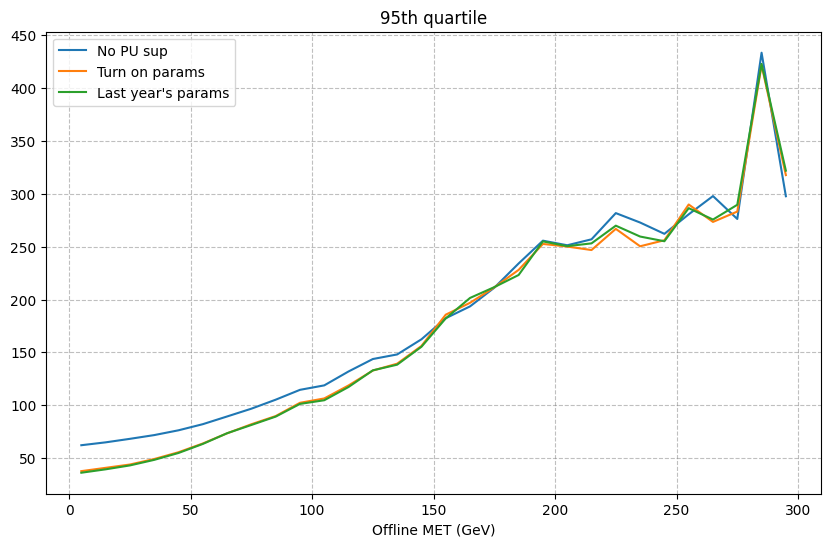

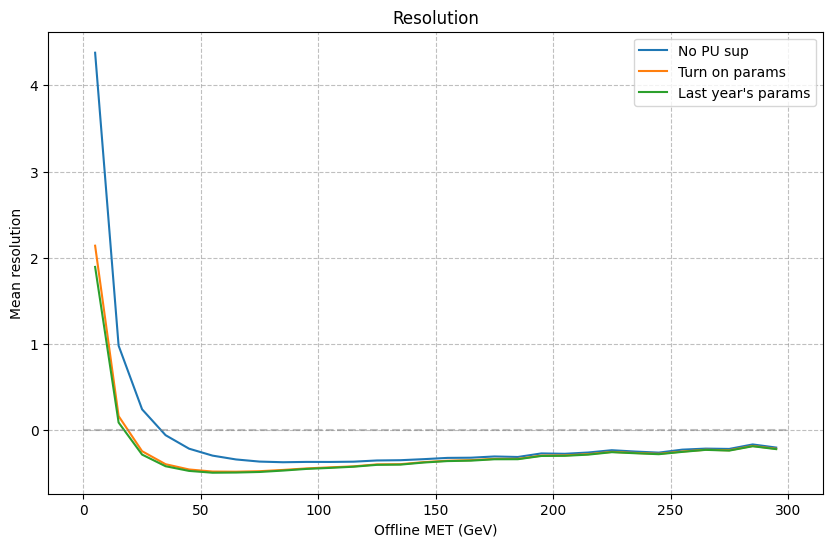

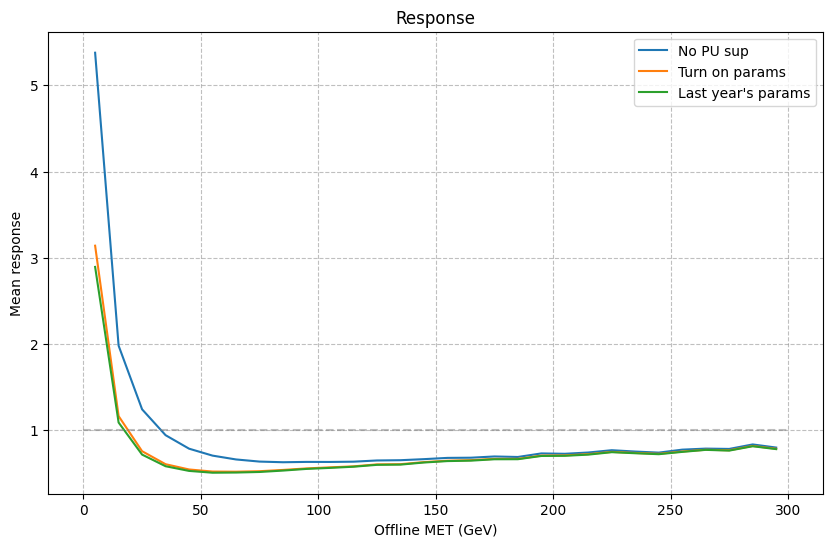

In [ ]:
whats = ["quart68", "quart95", "res", "resp"]
for what in whats:
    plotplots(
        (l1met, "No PU sup"),
        (turnon_MET, "Turn on params"),
        (lastyear_MET, "Last year's params"),
        what = what
    )